In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jedi.inference.utils import to_list

In [35]:
students = pd.DataFrame(
    {'Name': ['Bob', 'Ron'],
     'Student_ID': ['32155', '43226']})

grades = pd.DataFrame(
    {'ID': ['32155', '32155','32155','43226','43226','43226','43226'],
     'Class': ['English', 'History', 'Science', 'English', 'Math', 'Science', 'History'],
     'Grade': ['5', '4', '3', '5', '4', '5', '3']})

print(students)

  Name Student_ID
0  Bob      32155
1  Ron      43226


In [66]:
print(grades)

      ID    Class Grade
0  32155  English     5
1  32155  History     4
2  32155  Science     3
3  43226  English     5
4  43226     Math     4
5  43226  Science     5
6  43226  History     3


Запишите в папку filesCSV-файл с именем output.csvв формате, указанном ниже.

Student_ID | Class
-----------+--------

In [37]:
out = dict()
for index, row in grades.iterrows():
    out.update({row['ID']: row['Class']})
print(out)

{'32155': 'Science', '43226': 'History'}


In [38]:
out_df = pd.DataFrame({'Student_ID': list(out.keys()), 'Class': list(out.values())})
out_df.to_csv('output.csv')

In [77]:
def export_csv_with_name_and_grade( name, grade):
    mage_df = grades.merge(students, left_on = 'ID', right_on = 'Student_ID').reindex(columns=['Name', 'Student_ID', 'Class', 'Grade'])
    print(mage_df)
    print('_____________________')
    rec_df = mage_df[(mage_df['Name'] == name) & (mage_df['Grade'] == grade)].reindex(columns=['Student_ID', 'Class'])
    print(rec_df.rename)
    rec_df.to_csv('output.csv', index=False)

задача мерджануть по последней оценке

In [76]:
export_csv_with_name_and_grade("Bob", "5")

  Name Student_ID    Class Grade
0  Bob      32155  English     5
1  Bob      32155  History     4
2  Bob      32155  Science     3
3  Ron      43226  English     5
4  Ron      43226     Math     4
5  Ron      43226  Science     5
6  Ron      43226  History     3
_____________________
  Student_ID    Class
0      32155  English


In [79]:

df = pd.DataFrame({ 'A': [1,4], 'B': [2,5], 'C': [3,6] })
names = ['1', '2', '3']
d = dict(zip(list(df.columns), names))
df = df.rename(columns=d)
print(df)

   1  2  3
0  1  2  3
1  4  5  6


In [126]:
df_a = pd.DataFrame({'A': [2.5,2.0], 'B': [2.0,2.0], 'C': [2.0,2.0]})
df_b = pd.DataFrame({'C': [1.0,8.5], 'B': [6.0,1.0], 'D': [7.0,9.0], 'E': [1.0,1.0]})
new_a = df_a.copy()
new_a.update(df_b)
def test(x, y):
    res = x.combine(y, max)
    print(res)
    return res
new_a = new_a.combine(df_a, func= test)
print(new_a)

0    2.5
1    2.0
Name: A, dtype: float64
0    6.0
1    2.0
Name: B, dtype: float64
0    2.0
1    8.5
Name: C, dtype: float64
     A    B    C
0  2.5  6.0  2.0
1  2.0  2.0  8.5


In [134]:
dataframe = pd.DataFrame({'A': [[1,2], ['a','b','c'],77], 'B': [5,6,3]})
col = "A"

out = pd.DataFrame(columns=dataframe.columns)
colomns =  list(dataframe.columns)
for i in dataframe.index.values:
    new_rows = dict()
    el = dataframe.iloc[i]
    if isinstance(el[col], list) == False:
        for c in colomns:
            if type(el[c]) == np.int64:
                new_rows.update({c: [el[c].item()]})
            else:
                new_rows.update({c: [el[c]]})
    else:
        l = len(el[col])
        for c in colomns:
            print(type(el[c]))
            if c == col:
                new_rows.update({c: el[c]})
            elif type(el[c]) == np.int64:
                new_rows.update({c: [el[c].item()]*l})
            else:
                new_rows.update({c: [el[c]]*l})
    out = pd.concat([out, pd.DataFrame(new_rows)], ignore_index=True)
print(out)


<class 'list'>
<class 'numpy.int64'>
<class 'list'>
<class 'numpy.int64'>
    A  B
0   1  5
1   2  5
2   a  6
3   b  6
4   c  6
5  77  3


In [136]:
dataframe = pd.DataFrame({'A': [[1,2], ['a','b','c'],77], 'B': [5,6,3]})
col = "A"

df_copy = dataframe.copy()
result_df = df_copy.explode(col, ignore_index=True)
print(result_df)

    A  B
0   1  5
1   2  5
2   a  6
3   b  6
4   c  6
5  77  3


In [164]:
df = pd.DataFrame({ 'name': ['car', 'bike'],  'quantity': [2,3], 'price': [10000, 1000] })
role = "quantity- price"
new_column = "price_total"

def fun(df, role, new_column):
    def is_good_name(name):
        if name.isalpha():
            return True
        new_name = name.split("_")
        for i in range(len(new_name)):
            if new_name[i].isalpha() == False:
                return False
        return True
    
    if '*' in role:
        new_role = role.split("*")
        new_role.append("*")
    elif '/' in role:
        new_role = role.split("/")
        new_role.append("/")
    elif '-' in role:
        new_role = role.split("-")
        new_role.append("-")
    elif '+' in role:
        new_role = role.split("+")
        new_role.append("+")
    else:
        return pd.DataFrame()
        
    for i in range(len(new_role)-1):
        new_role[i] = new_role[i].strip()
        if is_good_name(new_role[i]) == False:
            return pd.DataFrame()
    if is_good_name(new_column) == False:
        return pd.DataFrame()
    if len(new_role) != 3:
        return pd.DataFrame()
    if new_role[0] not in df.columns:
        return pd.DataFrame()
    if new_role[1] not in df.columns:
        return pd.DataFrame()
    
    
    if new_role[2] == '*':
        df[new_column] = df[new_role[0]] * df[new_role[1]]
    elif new_role[2] == "+":
        df[new_column] = df[new_role[0]] + df[new_role[1]]
    elif new_role[2] == "-":
        df[new_column] = df[new_role[0]] - df[new_role[1]]
    elif new_role[2] == "/":
        df[new_column] = df[new_role[0]] / df[new_role[1]]
    else:
        return pd.DataFrame()
    return df
print(fun(df, role, new_column))
    


   name  quantity  price  price_total
0   car         2  10000        -9998
1  bike         3   1000         -997


In [165]:
df = pd.DataFrame({'A': [1,4,6,1], 'B': [2,5,3,1], 'C': [3,6,2,1]})
col = "A"
func = lambda x: x<=2

def filter_dataframe(df, col, func): 
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is not present in the DataFrame.")
    
    return df.drop(df[func(df[col])].index)
print(filter_dataframe(df, col, func))
    
    
    
    

   A  B  C
1  4  5  6
2  6  3  2


In [17]:

def reorder(a, b):
    arr = [np.roll(list(range(int(a/2))), b).tolist(), np.roll(list(range(int(a/2), a)), b).tolist()]
    return arr
    pass
print(reorder(10, 1))

[[4, 0, 1, 2, 3], [9, 5, 6, 7, 8]]


In [26]:
def looper(start, stop, number):
    a = np.linspace(start, stop, number)
    a = [float(x) for x in a]
    return a
    pass
a = looper(1, 5, 2)
print(a)
for i in a:
    print(type(i))

[1.0, 5.0]
<class 'float'>
<class 'float'>


In [37]:
df = pd.DataFrame({'A': [1,4,6,1], 'B': [2,5,3,1]})
print(df.loc[0:2,'A'])
print(df.iloc[0:2,0:2])
df = df.drop(1)
print()
print(df.loc[0:2,'A'])
print(df.iloc[0:2,0:2])

0    1
1    4
2    6
Name: A, dtype: int64
   A  B
0  1  2
1  4  5

0    1
2    6
Name: A, dtype: int64
   A  B
0  1  2
2  6  3


In [52]:
df = pd.DataFrame({'A': [1,4,6,2], 'B': ['1','5','3','1']})
print(df.loc[:,df.dtypes == np.int64])

   A
0  1
1  4
2  6
3  2


In [54]:
print(df.groupby(df['B']).std().reset_index())

   B         A
0  1  0.707107
1  3       NaN
2  5       NaN


Гайдик

In [56]:
# Creating a Series from a list
data = [10, 20, 30, 40, 50]
s = pd.Series(data)
print("Series from list:")
print(s)

# Creating a Series with a custom index
s_indexed = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])
print("\nSeries with custom index:")
print(s_indexed)

# Creating a Series from a dictionary
data_dict = {'Math': 90, 'Science': 85, 'English': 92}
s_dict = pd.Series(data_dict)
print("\nSeries from dictionary:")
print(s_dict)

Series from list:
0    10
1    20
2    30
3    40
4    50
dtype: int64

Series with custom index:
a    10
b    20
c    30
d    40
e    50
dtype: int64

Series from dictionary:
Math       90
Science    85
English    92
dtype: int64


In [57]:
# Creating a DataFrame from a dictionary of lists
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 28],
    'City': ['New York', 'Paris', 'London', 'Tokyo']
}
df = pd.DataFrame(data)
print("DataFrame from dictionary of lists:")
print(df)

# Accessing columns like a dictionary
print("\nAccessing 'Name' column:")
print(df['Name'])

# Accessing columns using dot notation (if column names are valid identifiers)
print("\nAccessing 'Age' column using dot notation:")
print(df.Age)

DataFrame from dictionary of lists:
      Name  Age      City
0    Alice   25  New York
1      Bob   30     Paris
2  Charlie   35    London
3    David   28     Tokyo

Accessing 'Name' column:
0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object

Accessing 'Age' column using dot notation:
0    25
1    30
2    35
3    28
Name: Age, dtype: int64


In [58]:
# Create a dummy CSV file for demonstration
csv_data = """Name,Age,City,Score
Alice,25,New York,88
Bob,30,Paris,92
Charlie,,London,75
David,28,Tokyo,NA
Eve,22,New York,81
Frank,35,Paris,95
Grace,29,,
Hannah,40,London,60
Ivan,27,Tokyo,78
Julia,33,New York,NA
"""

with open("sample_data.csv", "w") as f:
    f.write(csv_data)

# Load the CSV file into a DataFrame
df_csv = pd.read_csv("sample_data.csv")
print("DataFrame loaded from CSV:")
print(df_csv)

DataFrame loaded from CSV:
      Name   Age      City  Score
0    Alice  25.0  New York   88.0
1      Bob  30.0     Paris   92.0
2  Charlie   NaN    London   75.0
3    David  28.0     Tokyo    NaN
4      Eve  22.0  New York   81.0
5    Frank  35.0     Paris   95.0
6    Grace  29.0       NaN    NaN
7   Hannah  40.0    London   60.0
8     Ivan  27.0     Tokyo   78.0
9    Julia  33.0  New York    NaN


In [60]:
print("\n--- Initial Inspection of df_csv ---")
print("Head (first 3 rows):")
print(df_csv.head(3))

print("\nInfo:")
df_csv.info()

print("\nDescription of numerical columns:")
print(df_csv.describe())

print("\nShape:", df_csv.shape)
print("Columns:", df_csv.columns)


--- Initial Inspection of df_csv ---
Head (first 3 rows):
      Name   Age      City  Score
0    Alice  25.0  New York   88.0
1      Bob  30.0     Paris   92.0
2  Charlie   NaN    London   75.0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    10 non-null     object 
 1   Age     9 non-null      float64
 2   City    9 non-null      object 
 3   Score   7 non-null      float64
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes

Description of numerical columns:
             Age      Score
count   9.000000   7.000000
mean   29.888889  81.285714
std     5.441609  11.912379
min    22.000000  60.000000
25%    27.000000  76.500000
50%    29.000000  81.000000
75%    33.000000  90.000000
max    40.000000  95.000000

Shape: (10, 4)
Columns: Index(['Name', 'Age', 'City', 'Score'], dtype='object')


In [61]:
print("\nMissing values (boolean DataFrame):")
print(df_csv.isnull().head())

print("\nCount of missing values per column:")
print(df_csv.isnull().sum())


Missing values (boolean DataFrame):
    Name    Age   City  Score
0  False  False  False  False
1  False  False  False  False
2  False   True  False  False
3  False  False  False   True
4  False  False  False  False

Count of missing values per column:
Name     0
Age      1
City     1
Score    3
dtype: int64


In [62]:
# Drop rows with any missing values
df_cleaned_drop_rows = df_csv.dropna()
print("\nDataFrame after dropping rows with any NaN:")
print(df_cleaned_drop_rows)
print(f"Original shape: {df_csv.shape}, New shape: {df_cleaned_drop_rows.shape}")

# Drop columns with any missing values
df_cleaned_drop_cols = df_csv.dropna(axis=1)
print("\nDataFrame after dropping columns with any NaN:")
print(df_cleaned_drop_cols)
print(f"Original shape: {df_csv.shape}, New shape: {df_cleaned_drop_cols.shape}")

# Drop rows only if 'Age' or 'Score' is missing
df_cleaned_subset = df_csv.dropna(subset=['Age', 'Score'])
print("\nDataFrame after dropping rows where 'Age' or 'Score' is NaN:")
print(df_cleaned_subset)
print(f"Original shape: {df_csv.shape}, New shape: {df_cleaned_subset.shape}")


DataFrame after dropping rows with any NaN:
     Name   Age      City  Score
0   Alice  25.0  New York   88.0
1     Bob  30.0     Paris   92.0
4     Eve  22.0  New York   81.0
5   Frank  35.0     Paris   95.0
7  Hannah  40.0    London   60.0
8    Ivan  27.0     Tokyo   78.0
Original shape: (10, 4), New shape: (6, 4)

DataFrame after dropping columns with any NaN:
      Name
0    Alice
1      Bob
2  Charlie
3    David
4      Eve
5    Frank
6    Grace
7   Hannah
8     Ivan
9    Julia
Original shape: (10, 4), New shape: (10, 1)

DataFrame after dropping rows where 'Age' or 'Score' is NaN:
     Name   Age      City  Score
0   Alice  25.0  New York   88.0
1     Bob  30.0     Paris   92.0
4     Eve  22.0  New York   81.0
5   Frank  35.0     Paris   95.0
7  Hannah  40.0    London   60.0
8    Ivan  27.0     Tokyo   78.0
Original shape: (10, 4), New shape: (6, 4)


In [63]:
# Create a copy to demonstrate fillna without altering original df_csv
df_filled = df_csv.copy()

# Fill 'Age' with the mean age
df_filled['Age'].fillna(df_filled['Age'].mean(), inplace=True)

# Fill 'City' with a placeholder (e.g., 'Unknown')
df_filled['City'].fillna('Unknown', inplace=True)

# Fill 'Score' with the median score
df_filled['Score'].fillna(df_filled['Score'].median(), inplace=True)

print("\nDataFrame after filling missing values:")
print(df_filled)
print("\nMissing values after filling:")
print(df_filled.isnull().sum())


DataFrame after filling missing values:
      Name        Age      City  Score
0    Alice  25.000000  New York   88.0
1      Bob  30.000000     Paris   92.0
2  Charlie  29.888889    London   75.0
3    David  28.000000     Tokyo   81.0
4      Eve  22.000000  New York   81.0
5    Frank  35.000000     Paris   95.0
6    Grace  29.000000   Unknown   81.0
7   Hannah  40.000000    London   60.0
8     Ivan  27.000000     Tokyo   78.0
9    Julia  33.000000  New York   81.0

Missing values after filling:
Name     0
Age      0
City     0
Score    0
dtype: int64


C:\Users\fstru\AppData\Local\Temp\ipykernel_286672\1612080227.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['Age'].fillna(df_filled['Age'].mean(), inplace=True)
C:\Users\fstru\AppData\Local\Temp\ipykernel_286672\1612080227.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

5. Методы очистки и предварительной обработки данных
Помимо пропущенных значений, очистка данных включает в себя обработку дубликатов, неверных типов данных и непоследовательных записей.

5.1 Изменение типов данных
Pandas часто выводит типы данных, но иногда они могут быть неверными или неоптимальными. df.astype()допускает явное преобразование типов.

In [64]:
print("\nOriginal data types:")
print(df_csv.dtypes)

# 'Age' and 'Score' are float64 due to NaN. If we fill them, we can convert to int.
# Let's use our df_filled for this.
df_typed = df_filled.copy()
df_typed['Age'] = df_typed['Age'].astype(int)
df_typed['Score'] = df_typed['Score'].astype(int)

print("\nData types after conversion:")
print(df_typed.dtypes)
print("\nDataFrame with updated types:")
print(df_typed)


Original data types:
Name      object
Age      float64
City      object
Score    float64
dtype: object

Data types after conversion:
Name     object
Age       int64
City     object
Score     int64
dtype: object

DataFrame with updated types:
      Name  Age      City  Score
0    Alice   25  New York     88
1      Bob   30     Paris     92
2  Charlie   29    London     75
3    David   28     Tokyo     81
4      Eve   22  New York     81
5    Frank   35     Paris     95
6    Grace   29   Unknown     81
7   Hannah   40    London     60
8     Ivan   27     Tokyo     78
9    Julia   33  New York     81


Обычные преобразования включают int, float, str(или object), datetime.

5.2 Обработка дубликатов
Дублирующиеся строки могут исказить результаты анализа.

df.duplicated(): Возвращает логическую серию, указывающую, является ли каждая строка дубликатом предыдущей строки.
df.drop_duplicates(): Удаляет дублирующиеся строки.

In [65]:
# Create a DataFrame with duplicates
data_dup = {
    'ID': [1, 2, 3, 1, 4, 2],
    'Value': ['A', 'B', 'C', 'A', 'D', 'B']
}
df_duplicates = pd.DataFrame(data_dup)
print("\nDataFrame with duplicates:")
print(df_duplicates)

print("\nBoolean Series for duplicated rows:")
print(df_duplicates.duplicated())

# Drop duplicate rows
df_no_duplicates = df_duplicates.drop_duplicates()
print("\nDataFrame after dropping duplicates (keeping first occurrence):")
print(df_no_duplicates)

# Drop duplicates based on specific columns
df_duplicates_subset = df_duplicates.drop_duplicates(subset=['ID'], keep='first')
print("\nDataFrame after dropping duplicates based on 'ID':")
print(df_duplicates_subset)


DataFrame with duplicates:
   ID Value
0   1     A
1   2     B
2   3     C
3   1     A
4   4     D
5   2     B

Boolean Series for duplicated rows:
0    False
1    False
2    False
3     True
4    False
5     True
dtype: bool

DataFrame after dropping duplicates (keeping first occurrence):
   ID Value
0   1     A
1   2     B
2   3     C
4   4     D

DataFrame after dropping duplicates based on 'ID':
   ID Value
0   1     A
1   2     B
2   3     C
4   4     D


keep='first'(по умолчанию): сохраняет первое вхождение и удаляет последующие дубликаты.
keep='last': Сохраняет последнее вхождение.
keep=False: Удаляет все дубликаты.

5.3 Переименование столбцов
Четкие и единообразные названия столбцов имеют решающее значение для удобства чтения.

In [66]:
df_renamed = df_csv.copy()

# Rename specific columns using a dictionary
df_renamed.rename(columns={'Name': 'Student_Name', 'Score': 'Final_Score'}, inplace=True)
print("\nDataFrame after renaming specific columns:")
print(df_renamed.head())

# Or assign a new list of all column names (ensure order matches!)
df_renamed_all = df_csv.copy()
df_renamed_all.columns = ['Student', 'Years_Old', 'Location', 'Result']
print("\nDataFrame after renaming all columns:")
print(df_renamed_all.head())


DataFrame after renaming specific columns:
  Student_Name   Age      City  Final_Score
0        Alice  25.0  New York         88.0
1          Bob  30.0     Paris         92.0
2      Charlie   NaN    London         75.0
3        David  28.0     Tokyo          NaN
4          Eve  22.0  New York         81.0

DataFrame after renaming all columns:
   Student  Years_Old  Location  Result
0    Alice       25.0  New York    88.0
1      Bob       30.0     Paris    92.0
2  Charlie        NaN    London    75.0
3    David       28.0     Tokyo     NaN
4      Eve       22.0  New York    81.0


5.4 Манипуляции со строками (для столбцов типа «object»)
Текстовые данные часто требуют очистки. В библиотеках Panda Seriesс objectтипом dtype (обычно строками) есть .strаксессор для строковых методов.

In [67]:
df_str_clean = df_csv.copy()

# Convert City names to uppercase
df_str_clean['City'] = df_str_clean['City'].str.upper()
print("\nCity column after converting to uppercase:")
print(df_str_clean['City'].head())

# Remove leading/trailing whitespace
df_str_clean['City'] = df_str_clean['City'].str.strip()

# Replace specific substrings (e.g., 'NEW YORK' to 'NYC')
df_str_clean['City'] = df_str_clean['City'].str.replace('NEW YORK', 'NYC')
print("\nCity column after replacing 'NEW YORK' with 'NYC':")
print(df_str_clean['City'].head())

# Check for specific strings
df_str_clean['Is_Paris'] = df_str_clean['City'].str.contains('PARIS', na=False)
print("\nNew column 'Is_Paris':")
print(df_str_clean[['City', 'Is_Paris']].head())


City column after converting to uppercase:
0    NEW YORK
1       PARIS
2      LONDON
3       TOKYO
4    NEW YORK
Name: City, dtype: object

City column after replacing 'NEW YORK' with 'NYC':
0       NYC
1     PARIS
2    LONDON
3     TOKYO
4       NYC
Name: City, dtype: object

New column 'Is_Paris':
     City  Is_Paris
0     NYC     False
1   PARIS      True
2  LONDON     False
3   TOKYO     False
4     NYC     False


6. Индексация и выбор данных
Эффективный выбор подмножеств данных имеет решающее значение для целенаправленной очистки и анализа.

6.1 Базовый выбор
Один столбец: df['ColumnName'] (возвращает серию).
Несколько столбцов: df[['Col1', 'Col2']] (возвращает DataFrame).

In [68]:
print("\nSelecting a single column ('Age'):")
print(df_typed['Age'].head())

print("\nSelecting multiple columns ('Name', 'Score'):")
print(df_typed[['Name', 'Score']].head())


Selecting a single column ('Age'):
0    25
1    30
2    29
3    28
4    22
Name: Age, dtype: int64

Selecting multiple columns ('Name', 'Score'):
      Name  Score
0    Alice     88
1      Bob     92
2  Charlie     75
3    David     81
4      Eve     81


6.2 Выбор по метке ( .loc)
locВ основном основан на метках. Вы можете выбирать по меткам строк и столбцов.

df.loc[row_label, column_label]

In [69]:
# Select a single row by index label
print("\nRow with index label 0:")
print(df_typed.loc[0])

# Select multiple rows by index labels
print("\nRows with index labels 0, 2, 4:")
print(df_typed.loc[[0, 2, 4]])

# Select rows and specific columns
print("\nRows 0-2 and columns 'Name', 'City':")
print(df_typed.loc[0:2, ['Name', 'City']])

# Select all rows and specific columns
print("\nAll rows, 'Name' and 'Score' columns:")
print(df_typed.loc[:, ['Name', 'Score']].head())


Row with index label 0:
Name        Alice
Age            25
City     New York
Score          88
Name: 0, dtype: object

Rows with index labels 0, 2, 4:
      Name  Age      City  Score
0    Alice   25  New York     88
2  Charlie   29    London     75
4      Eve   22  New York     81

Rows 0-2 and columns 'Name', 'City':
      Name      City
0    Alice  New York
1      Bob     Paris
2  Charlie    London

All rows, 'Name' and 'Score' columns:
      Name  Score
0    Alice     88
1      Bob     92
2  Charlie     75
3    David     81
4      Eve     81


6.3 Выбор по должности ( .iloc)
ilocВ основном основан на целочисленных позициях. Работает как стандартная срезка в Python.

df.iloc[row_index, col_index]

In [70]:
# Select a single row by integer position
print("\nRow at integer position 0:")
print(df_typed.iloc[0])

# Select multiple rows by integer positions
print("\nRows at integer positions 0, 2, 4:")
print(df_typed.iloc[[0, 2, 4]])

# Select rows by slice and specific column by position
print("\nRows from position 0 to 2 (exclusive) and column at position 0 ('Name'):")
print(df_typed.iloc[0:3, 0])

# Select all rows and columns from position 0 to 2 (exclusive)
print("\nAll rows, columns from position 0 to 2 (Name, Age):")
print(df_typed.iloc[:, 0:2].head())


Row at integer position 0:
Name        Alice
Age            25
City     New York
Score          88
Name: 0, dtype: object

Rows at integer positions 0, 2, 4:
      Name  Age      City  Score
0    Alice   25  New York     88
2  Charlie   29    London     75
4      Eve   22  New York     81

Rows from position 0 to 2 (exclusive) and column at position 0 ('Name'):
0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

All rows, columns from position 0 to 2 (Name, Age):
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   29
3    David   28
4      Eve   22


6.4 Условный выбор (булевское индексирование)
Это мощный метод отбора данных на основе условий.

In [71]:
# Select all rows where Age is greater than 30
df_over_30 = df_typed[df_typed['Age'] > 30]
print("\nStudents over 30 years old:")
print(df_over_30)

# Select students from 'New York' with a Score above 80
df_ny_high_score = df_typed[(df_typed['City'] == 'New York') & (df_typed['Score'] > 80)]
print("\nStudents from New York with score > 80:")
print(df_ny_high_score)

# Using .loc for conditional selection (often preferred for clarity)
df_london_scores = df_typed.loc[df_typed['City'] == 'London', ['Name', 'Score']]
print("\nNames and Scores of students from London:")
print(df_london_scores)


Students over 30 years old:
     Name  Age      City  Score
5   Frank   35     Paris     95
7  Hannah   40    London     60
9   Julia   33  New York     81

Students from New York with score > 80:
    Name  Age      City  Score
0  Alice   25  New York     88
4    Eve   22  New York     81
9  Julia   33  New York     81

Names and Scores of students from London:
      Name  Score
2  Charlie     75
7   Hannah     60


7. Группировка и агрегация (ключевая функция статистических отчетов)
groupby()— одна из самых мощных функций Pandas, позволяющая разбить данные на группы по определённым критериям, применить функцию к каждой группе независимо, а затем объединить результаты. Это крайне важно для создания статистических отчётов.

Общий рабочий процесс такой: Разделить -> Применить -> Объединить .

7.1 Базовые groupby()и агрегационные
Общие функции агрегации включают в себя mean(), sum(), count(), min(), max(), std(), var(), median().

In [72]:
# Let's use our cleaned df_typed for grouping
print("\nOriginal DataFrame (df_typed):")
print(df_typed)

# Group by 'City' and calculate the average Age and Score
city_stats = df_typed.groupby('City').mean()
print("\nAverage Age and Score by City:")
print(city_stats)

# Group by 'City' and count the number of students
city_counts = df_typed.groupby('City')['Name'].count().reset_index()
city_counts.rename(columns={'Name': 'Student_Count'}, inplace=True)
print("\nNumber of Students by City:")
print(city_counts)

# Group by 'City' and find the maximum score
city_max_score = df_typed.groupby('City')['Score'].max()
print("\nMaximum Score by City:")
print(city_max_score)


Original DataFrame (df_typed):
      Name  Age      City  Score
0    Alice   25  New York     88
1      Bob   30     Paris     92
2  Charlie   29    London     75
3    David   28     Tokyo     81
4      Eve   22  New York     81
5    Frank   35     Paris     95
6    Grace   29   Unknown     81
7   Hannah   40    London     60
8     Ivan   27     Tokyo     78
9    Julia   33  New York     81


TypeError: agg function failed [how->mean,dtype->object]

Этот reset_index()метод часто используется затем groupby()для преобразования групповых ключей (например, «Город») из индекса обратно в обычный столбец, делая вывод более похожим на традиционный DataFrame.

7.2 Множественные функции агрегации
Используя этот метод, можно применить несколько функций агрегации к одному или нескольким столбцам agg().

In [73]:
# Group by 'City' and calculate mean, median, min, max for 'Age' and 'Score'
multi_agg = df_typed.groupby('City').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Score': ['mean', 'min', 'max', 'std']
})
print("\nMultiple aggregations by City:")
print(multi_agg)

# Flattening multi-level columns (optional, for cleaner output)
multi_agg.columns = ['_'.join(col).strip() for col in multi_agg.columns.values]
print("\nMultiple aggregations with flattened columns:")
print(multi_agg)


Multiple aggregations by City:
                Age                     Score                   
               mean median min max       mean min max        std
City                                                            
London    34.500000   34.5  29  40  67.500000  60  75  10.606602
New York  26.666667   25.0  22  33  83.333333  81  88   4.041452
Paris     32.500000   32.5  30  35  93.500000  92  95   2.121320
Tokyo     27.500000   27.5  27  28  79.500000  78  81   2.121320
Unknown   29.000000   29.0  29  29  81.000000  81  81        NaN

Multiple aggregations with flattened columns:
           Age_mean  Age_median  Age_min  Age_max  Score_mean  Score_min  \
City                                                                       
London    34.500000        34.5       29       40   67.500000         60   
New York  26.666667        25.0       22       33   83.333333         81   
Paris     32.500000        32.5       30       35   93.500000         92   
Tokyo     27.500000  

7.3 Применение пользовательских функций
Вы можете применять собственные пользовательские функции, используя apply()after groupby().

In [74]:
# Define a custom function to calculate range (max - min)
def score_range(series):
    return series.max() - series.min()

# Group by 'City' and apply the custom function to 'Score'
city_score_range = df_typed.groupby('City')['Score'].apply(score_range)
print("\nScore Range by City (Custom Function):")
print(city_score_range)


Score Range by City (Custom Function):
City
London      15
New York     7
Paris        3
Tokyo        3
Unknown      0
Name: Score, dtype: int64


8. Базовая визуализация данных с помощью Matplotlib
Хотя в Pandas есть встроенные возможности построения графиков (которые используют Matplotlib), непосредственное использование Matplotlib даёт больше контроля. Визуализация агрегированных данных часто бывает очень полезна для статистических отчётов.

8.1 Настройка Matplotlib
Убедитесь, что у вас matplotlibустановлен ( pip install matplotlib).

In [75]:
import matplotlib.pyplot as plt

8.2 Столбчатая диаграмма сгруппированных данных
Давайте визуализируем средний балл по городам.

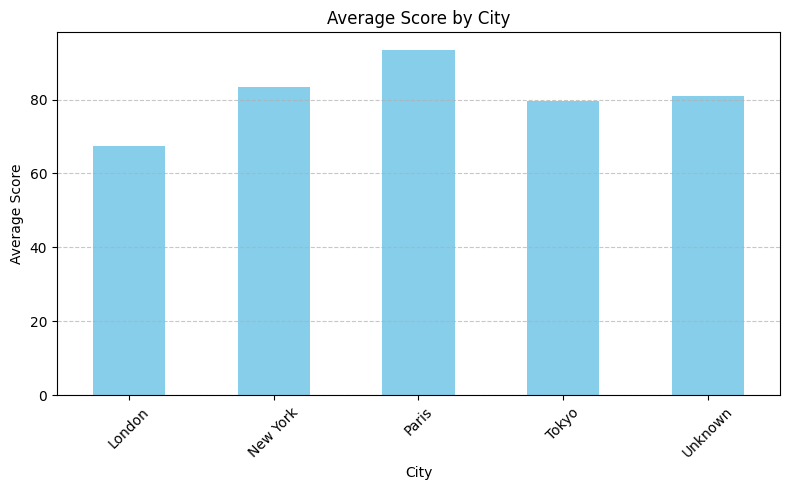

In [86]:
# Calculate average score per city
avg_score_by_city = df_typed.groupby('City')['Score'].mean()

plt.figure(figsize=(8, 5)) # Set figure size
avg_score_by_city.plot(kind='bar', color='skyblue')
plt.title('Average Score by City')
plt.xlabel('City')
plt.ylabel('Average Score')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Это создает столбчатую диаграмму, где каждый столбец представляет город, а его высота соответствует среднему баллу.

8.3 Гистограмма числового столбца
Гистограммы полезны для понимания распределения одной числовой переменной.

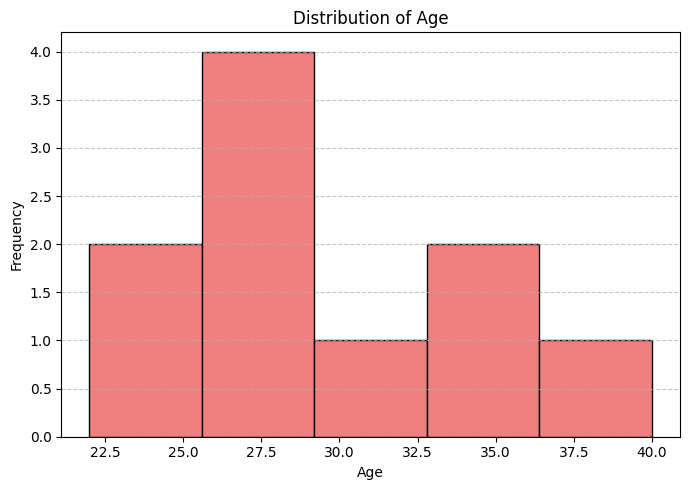

In [88]:
plt.figure(figsize=(7, 5))
df_typed['Age'].plot(kind='hist', bins=5, edgecolor='black', color='lightcoral')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

8.4 Диаграмма рассеяния для связи между двумя переменными
Диаграммы рассеяния помогают визуализировать взаимосвязь между двумя числовыми переменными.

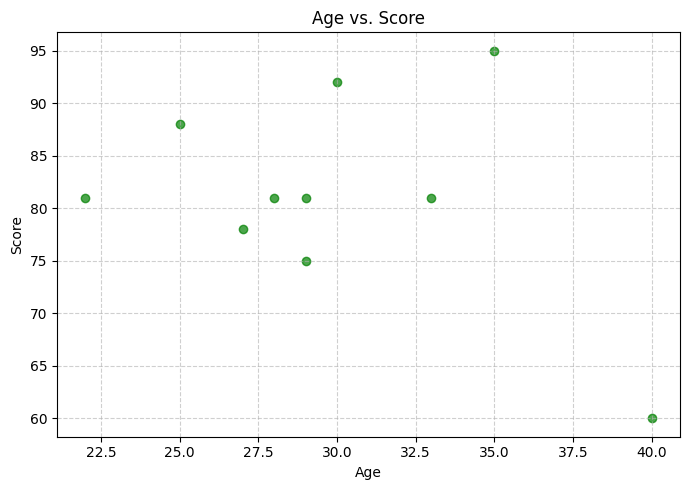

In [92]:
# First, ensure we have no NaNs for plotting to avoid issues
df_plot = df_typed.dropna(subset=['Age', 'Score']).copy()
plt.figure(figsize=(7, 5))
plt.scatter(df_plot['Age'], df_plot['Score'], color='green', alpha=0.7)
plt.title('Age vs. Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

8.5 Линейный график для данных временного ряда (концептуальный)
Хотя наш текущий набор данных не является временным рядом, полезно знать, как его концептуально построить. Если у вас есть столбец «Дата»:

            Value
Date             
2023-01-01     10
2023-01-02     12
2023-01-03     11
2023-01-04     15


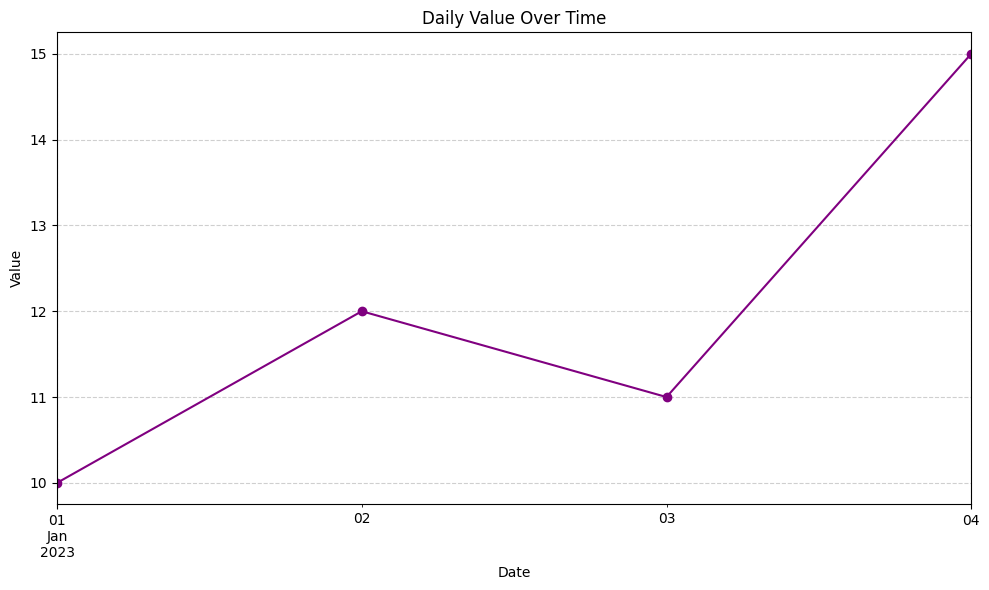

In [94]:
# Example with dummy time series data (not from df_typed)
dummy_ts_data = {
    'Date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04']),
    'Value': [10, 12, 11, 15]
}
df_ts = pd.DataFrame(dummy_ts_data).set_index('Date')
plt.figure(figsize=(10, 6))
df_ts['Value'].plot(kind='line', marker='o', color='purple')
plt.title('Daily Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

9. Сохранение очищенных данных
После всей очистки и предварительной обработки вам наверняка захочется сохранить DataFrame.

9.1 Сохранение в CSV

In [95]:
# Save the cleaned and processed DataFrame (e.g., df_typed)
df_typed.to_csv("cleaned_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_data.csv'")

# The `index=False` argument prevents Pandas from writing the DataFrame index as a column in the CSV.


Cleaned data saved to 'cleaned_data.csv'
